[Home](../../README.md)

### Data Preprocessing

This Jupyter Notebook demonstrates different processes you can apply to your data to better understand it before data wrangling. For this demonstration we will use relatively a complex real dataset that compares health measures with the speed of progress of type 2 adult onset diabetes.

#### Load the required dependencies

Load the two required dependencies:

- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [1]:
# Import frameworks
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [2]:
data_frame = pd.read_csv("2.1.2.diabeties_sample_data.csv")

#### Data Snapshot

It is important to get a high-level look at your dataset to understand what you are working with. Printing the complete data might be impossible for large-scale datasets where the rows can be in thousands or even millions.

You can use the `head()` and `tail()` method call to inspect the first and last 5 rows of your dataset.

In [3]:
# Target = A measure of disease progression in one year
data_frame.head()

,DoB,DoT,SEX,BMI,BP,TC,BGU,FDR,Target
0,26/07/1980,18/10/2024,Male,25.4,95.0,3.0,83,0,25.0
1,21/01/1975,6/01/2024,Male,25.6,76.0,3.0,78,1,31.0
2,10/02/1983,1/02/2024,Male,20.5,80.0,2.0,75,1,37.0
3,1/04/1985,9/05/2024,Female,21.2,90.0,3.0,98,1,39.0
4,17/02/1964,25/03/2024,Male,25.6,78.0,2.0,87,0,39.0


####  Data Summary
 
The `info()` method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DoB     444 non-null    object 
 1   DoT     444 non-null    object 
 2   SEX     443 non-null    object 
 3   BMI     444 non-null    float64
 4   BP      444 non-null    float64
 5   TC      444 non-null    float64
 6   BGU     444 non-null    int64  
 7   FDR     444 non-null    int64  
 8   Target  443 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 31.3+ KB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [5]:
data_frame.describe()

,BMI,BP,TC,BGU,FDR,Target
count,444.000000,444.000000,444.000000,444.000000,444.000000,443.000000
mean,26.355405,94.661374,4.069572,91.268018,1.069820,151.724605
std,4.421152,14.203099,1.289056,11.471144,0.832245,77.266367
min,18.000000,51.000000,2.000000,58.000000,0.000000,25.000000
25%,23.175000,84.000000,3.000000,83.750000,0.000000,85.500000
50%,25.700000,93.000000,4.000000,91.000000,1.000000,140.000000
75%,29.225000,105.000000,5.000000,98.000000,2.000000,211.000000
max,42.200000,141.000000,9.090000,124.000000,3.000000,346.000000


#### Graphically present the data

At this early stage you are just wanting to evaluate the data, the below simple plots lets you look the data in different ways to inform your model design and data wrangling approaches.

<Axes: >

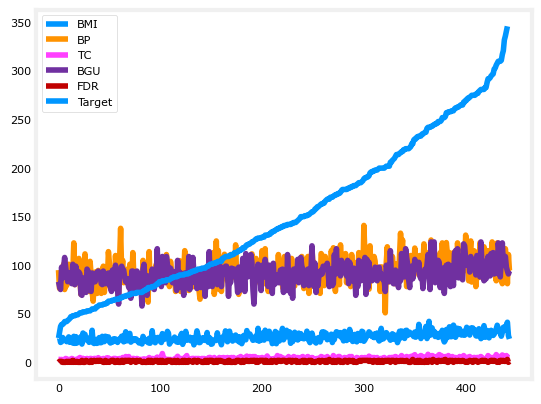

In [6]:
# plotting a bar graph 
data_frame.plot()

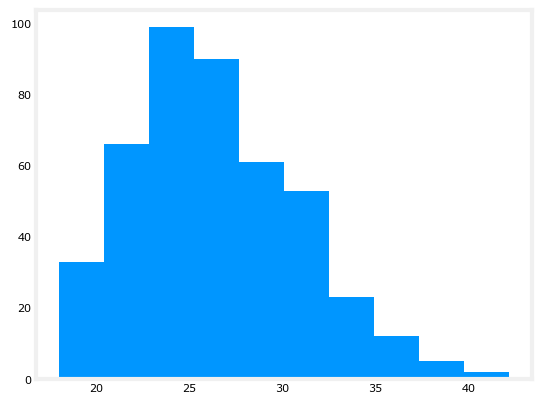

In [7]:
# Plot the specific column points
plt.hist(data_frame['BMI'])
plt.show()

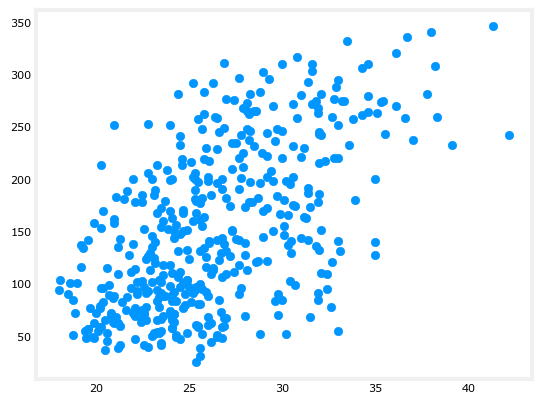

In [8]:
# Scatter plot 2 columns to see the relationship
plt.scatter(data_frame['BMI'], data_frame['Target'])
plt.show()

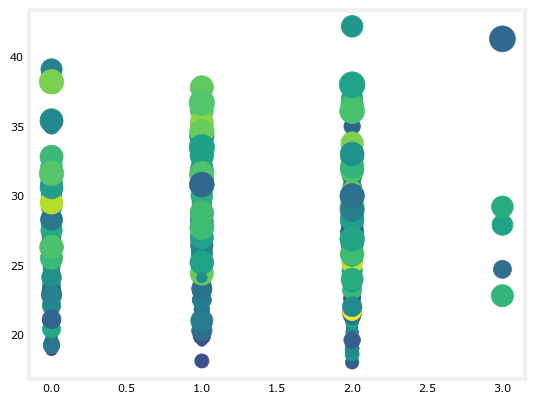

In [9]:
# Scatter plot 3 (or more) columns to see the relationship
plt.scatter(data_frame['FDR'], data_frame['BMI'], data_frame['Target'], data_frame['BP'])
plt.show()